In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

In [2]:
# connected with google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#  Load Data
df = pd.read_csv('/content/drive/MyDrive/Data science 2026/Data/YourCabs.csv')

In [3]:
# Display 3 rows
df.head(3)

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0


In [4]:
# checking, How many rows and columns?.
df.shape

(43431, 18)

which columns drop? - why. which columns create new columns?. why.

In [30]:
# id -drop- unique
# user_id -drop - Personal Information Identity
# vehicle_model_id - keep - without vehicle number_id, how passenger travel?. vehicle is important.
# package_id - drop - soo much columns value is missing.
# travel_type_id - keep - 'YourCab' company gives 3 types of services is important.
# from_area_id - drop - pincode or area_name is not usefull
# to_area_id - drop - pincode or area_name is not usefull
# from_city_id - drop - city name is not useful for predictions booking unavailable car cancel or not cancel.
# to_city_id -drop - city name is not useful for predictions boooking unavailable car cancel or not cancel.
# from_date - create -hours, week, month create columns.
# online_booking - keep - online booking find cancel or not cancel unavailablity car.
# mobile_site_booking - keep - mobile_site_booking find cancel or not cancel unavailablity car.
# booking_created - create - from_date & booking_created time difference.
# from_lat - keep -  journey starting place.
# from_long - keep - journey starting place.
# to_lat - drop - so much missing value.
# to_from -drop - so much missing value.
# Car_Cancellation - keep - Target.

In [5]:
# checking all dtype columns & null values.
df.info() # from_date & booking_created dtype is object.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   43431 non-null  int64  
 1   user_id              43431 non-null  int64  
 2   vehicle_model_id     43431 non-null  int64  
 3   package_id           7550 non-null   float64
 4   travel_type_id       43431 non-null  int64  
 5   from_area_id         43343 non-null  float64
 6   to_area_id           34293 non-null  float64
 7   from_city_id         16345 non-null  float64
 8   to_city_id           1588 non-null   float64
 9   from_date            43431 non-null  object 
 10  online_booking       43431 non-null  int64  
 11  mobile_site_booking  43431 non-null  int64  
 12  booking_created      43431 non-null  object 
 13  from_lat             43338 non-null  float64
 14  from_long            43338 non-null  float64
 15  to_lat               34293 non-null 

In [6]:
# Change datatype object to  datatimeformate.
df['from_date'] = pd.to_datetime(df['from_date'], errors='coerce')
df['booking_created'] = pd.to_datetime(df['booking_created'], errors='coerce')

In [7]:
df.shape

(43431, 18)

In [8]:
df.from_date.isnull().sum() # Total rows=43,431. 'Nat' values present in columns=26,001. 50% above data missing, i cann't delete columns because from_date column is important.

np.int64(26001)

In [9]:
df.booking_created.isnull().sum() # Total rows=43,431. 'Nat' values present in columns=26,007. 50% above data missing, i cann't delete columns because 'booking_created' column is important.

np.int64(26007)

In [10]:
# Drop rows with invalid dates.
df = df.dropna(subset=['from_date', 'booking_created'])

In [11]:
df.shape

(15786, 18)

In [12]:
# Time difference (How many hours in advance was the booking made?
df['time_diff'] = (df['from_date'] - df['booking_created']).dt.total_seconds() / 3600

In [13]:
#  Extract date components
df['from_hour'] = df['from_date'].dt.hour
df['from_day_of_week'] = df['from_date'].dt.dayofweek
df['from_month'] = df['from_date'].dt.month

In [14]:
# first 5 row data display.
df.head(3)

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,...,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,time_diff,from_hour,from_day_of_week,from_month
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,2013-01-01 02:00:00,...,2013-01-01 01:39:00,12.924150,77.672290,12.927320,77.635750,0,0.350000,2,1,1
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,2013-01-01 09:00:00,...,2013-01-01 02:25:00,12.966910,77.749350,12.927680,77.626640,0,6.583333,9,1,1
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,2013-01-01 03:30:00,...,2013-01-01 03:08:00,12.937222,77.626915,13.047926,77.597766,0,0.366667,3,1,1


In [15]:
df1=df # I create 'df1' dataframe because get important features.

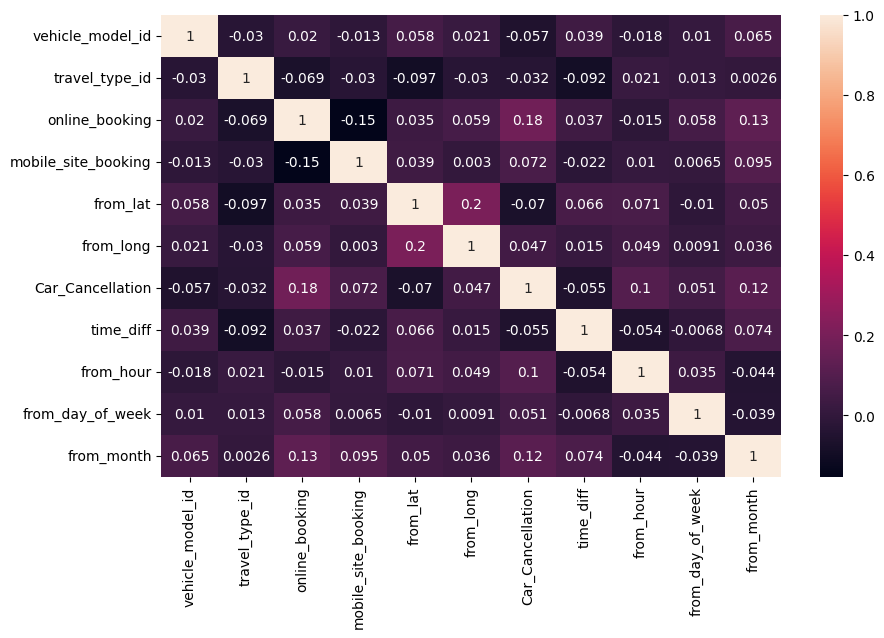

In [21]:
plt.figure(figsize=(10, 6))
a=df.corr()
sns.heatmap(a,annot=True)
plt.show()

In [16]:
# drop unwanted columns.
df.drop(columns=['id','user_id','package_id','from_area_id','to_area_id','from_city_id','to_city_id','to_lat','to_long','from_date','booking_created'], inplace=True)

In [17]:
df.head(3)

,vehicle_model_id,travel_type_id,online_booking,mobile_site_booking,from_lat,from_long,Car_Cancellation,time_diff,from_hour,from_day_of_week,from_month
0,28,2,0,0,12.924150,77.672290,0,0.350000,2,1,1
1,12,2,0,0,12.966910,77.749350,0,6.583333,9,1,1
2,12,2,0,0,12.937222,77.626915,0,0.366667,3,1,1


In [17]:
print((df.isnull().sum().sum()/ (df.shape[0]*df.shape[1]))*100) # overall dataframe null value present 0.035% out of 10%. use fill value
(df.isnull().sum()/ df.shape[0])* 100                                  # 5% above remove columns.

0.03570482475841655


,0
vehicle_model_id,0.000000
travel_type_id,0.000000
online_booking,0.000000
mobile_site_booking,0.000000
from_lat,0.196377
from_long,0.196377
Car_Cancellation,0.000000
time_diff,0.000000
from_hour,0.000000
from_day_of_week,0.000000


In [18]:
# from_lat & from_long filling value with mode because it area id.
df.fillna({"from_lat":df["from_lat"].mode()[0],"from_long":df["from_long"].mode()[0]}, inplace=True)

In [19]:
# checking all null values is remove or not.
df.isnull().sum()

,0
vehicle_model_id,0
travel_type_id,0
online_booking,0
mobile_site_booking,0
from_lat,0
from_long,0
Car_Cancellation,0
time_diff,0
from_hour,0
from_day_of_week,0


In [22]:
df.shape

(15786, 11)

In [24]:
# creating x is features, y is target.
x=df.drop(columns=['Car_Cancellation'])
y=df['Car_Cancellation']

In [25]:
x.shape

(15786, 10)

In [26]:
x.head(2)

,vehicle_model_id,travel_type_id,online_booking,mobile_site_booking,from_lat,from_long,time_diff,from_hour,from_day_of_week,from_month
0,28,2,0,0,12.92415,77.67229,0.350000,2,1,1
1,12,2,0,0,12.96691,77.74935,6.583333,9,1,1


In [27]:
y.head(2)

,Car_Cancellation
0,0
1,0


In [31]:
# imbalanced data sets.
y.value_counts()

,count
Car_Cancellation,
0,14599
1,1187


In [28]:
# pip install imblearn
from imblearn.over_sampling import RandomOverSampler

In [29]:
RO=RandomOverSampler()
x, y =RO.fit_resample(x,y)
df2=pd.DataFrame(x)
df2['target']=y
df2['target'].value_counts()

,count
target,
0,14599
1,14599


In [30]:
# Train-Test Split
# 70% of data for training, 30% for testing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [31]:
# Model Training (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [32]:
# Evaluation
y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")   #  '0' is booking not cancel, '1' is booking cancel.
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.9828

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      4425
           1       0.97      1.00      0.98      4335

    accuracy                           0.98      8760
   macro avg       0.98      0.98      0.98      8760
weighted avg       0.98      0.98      0.98      8760



In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[4274,  151],
       [   0, 4335]])

In [34]:
features=df1.columns
print(features)

Index(['vehicle_model_id', 'travel_type_id', 'online_booking',
       'mobile_site_booking', 'from_lat', 'from_long', 'Car_Cancellation',
       'time_diff', 'from_hour', 'from_day_of_week', 'from_month'],
      dtype='object')


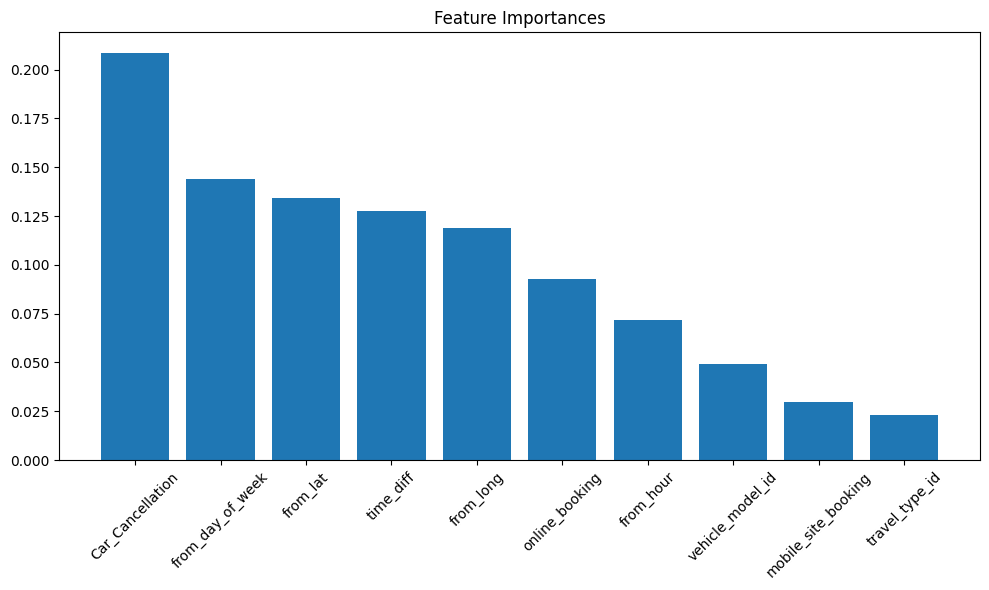

In [35]:
# Feature Importance Visualization
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(x.shape[1]), importances[indices], align="center")
plt.xticks(range(x.shape[1]), [features[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()
